**Buisness Understanding:**
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
The company wants to know:
1.Which variables are significant in predicting the price of a house
2.How well those variables describe the price of a house.

**Buisness Goal:**
We are required to build the modelfor the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Requirement:**
To build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
Also, determine the optimal value of lambda for ridge and lasso regression.

**Step1: Reading and understanding the data**

In [2]:
#importing the reqiuired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

In [3]:
#To set the max rows and columns
#pd.set_option("display.max_rows", None)
#pd.set_option("display.max_columns", None)


In [4]:
#path of the csv file
path=r'C:/Users/acer/Documents/PGDM/ML/Advanced Linear Reg/Advanced Regression-Assignment'

In [5]:
#importing the data
housing_df=pd.read_csv(path+'/train.csv')
housing_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#shape of the df
housing_df.shape

(1460, 81)

In [7]:
#understanding the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
housing_df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

**Step2:Understanding the Data**

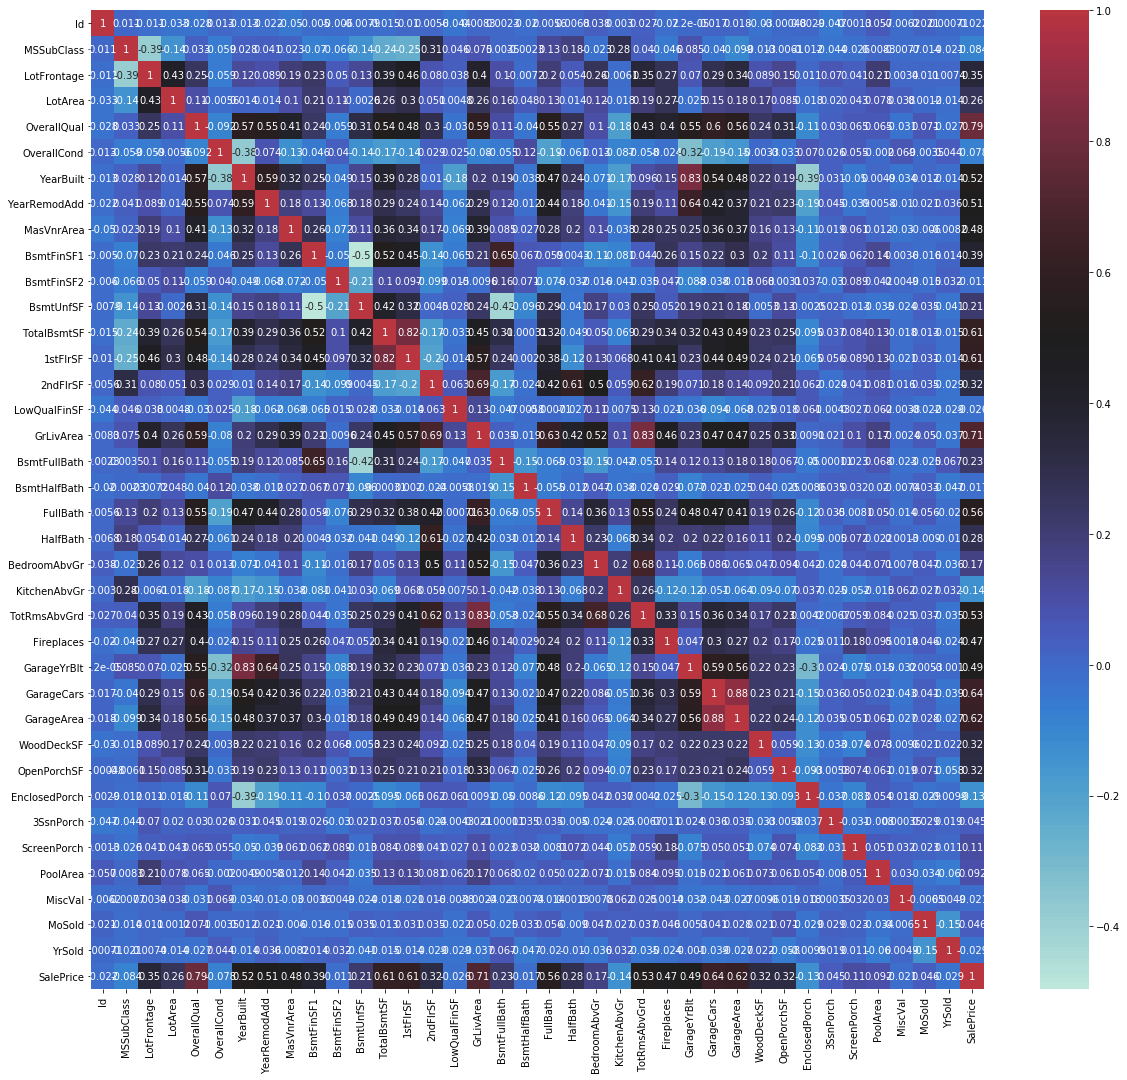

In [10]:
plt.figure(figsize=(20,18))
sns.heatmap(housing_df.corr(), annot=True, center=0.5)

As per the above heat map it seems sales price and OverallQual is highly correlated , yearBuilt and GarageYrBlt are highly correlated, GrLivArea and TotRmsAbvGr are highly correlated, GarageArea and garageCars are highly correlated

**Step3:Data Cleaning and Data Preparation**

In [11]:
#Dropping ID coloumn from the dataset
housing_df.drop("Id", axis = 1, inplace = True)

In [12]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
#Now check what percent of values are missing in a column
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)


MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 80, dtype: float64

In [14]:
#As per the data dictionary replacing the value of NA to the values specified in data dictionary, hence imputing the values
housing_df['Alley'].fillna('No Alley', inplace=True)

In [15]:
#imputing the values
housing_df['LotFrontage'].fillna(0, inplace=True)
housing_df['PoolQC'].fillna('No Pool', inplace=True)
housing_df['MiscFeature'].fillna('None', inplace=True)
housing_df['Fence'].fillna('No Fence', inplace=True)
housing_df['GarageQual'].fillna('No Garage', inplace=True)
housing_df['GarageCond'].fillna('No Garage', inplace=True)
housing_df['FireplaceQu'].fillna('No Fireplace', inplace=True)
housing_df['GarageType'].fillna('No Garage', inplace=True)
housing_df['GarageFinish'].fillna('No Garage', inplace=True)

In [16]:
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)


MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64

In [17]:
#imputing the values
housing_df['BsmtQual'].fillna('No Basement', inplace=True)
housing_df['BsmtCond'].fillna('No Basement', inplace=True)
housing_df['BsmtExposure'].fillna('No Basement', inplace=True)
housing_df['BsmtFinType1'].fillna('No Basement', inplace=True)
housing_df['BsmtFinType2'].fillna('No Basement', inplace=True)

In [18]:
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64

In [19]:
#Checking on Outliers
housing_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [20]:
#Checking all the integer and float values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

(1436, 80)

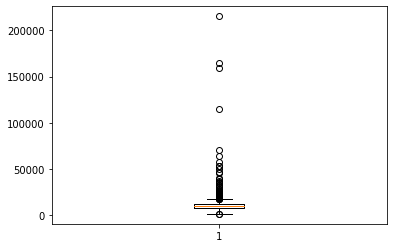

In [21]:
#Checking & treating the outliers
plt.boxplot(housing_df['LotArea'])
Q1 = housing_df['LotArea'].quantile(0.1)
Q3 = housing_df['LotArea'].quantile(0.9)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df['LotArea'] >= Q1 - 1.5*IQR) & 
                      (housing_df['LotArea'] <= Q3 + 1.5*IQR)]
housing_df.shape

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


(1416, 80)

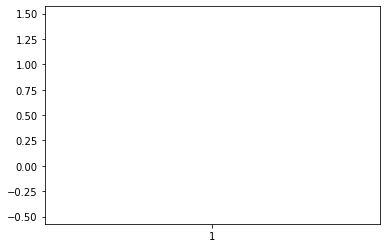

In [22]:
#checking and treating the outliers
plt.boxplot(housing_df['MasVnrArea'])
Q1 = housing_df['MasVnrArea'].quantile(0.1)
Q3 = housing_df['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (housing_df['MasVnrArea'] <= Q3 + 1.5*IQR)]
housing_df.shape

{'whiskers': [<matplotlib.lines.Line2D at 0x142c0f07f08>,
 'caps': [<matplotlib.lines.Line2D at 0x142c0f0bf88>,
 'boxes': [<matplotlib.lines.Line2D at 0x142c0ecd888>],
 'medians': [<matplotlib.lines.Line2D at 0x142c0f0ff48>],
 'fliers': [<matplotlib.lines.Line2D at 0x142c0f0ff88>],
 'means': []}

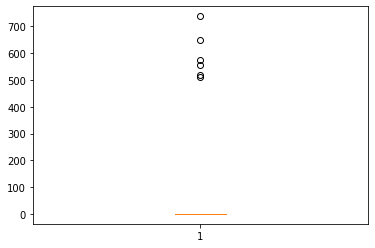

In [23]:
#Checking Outliers
plt.boxplot(housing_df['PoolArea'])


In [24]:
#there seems to be some outlier in this coloumn hence treating the same
Q1 = housing_df['PoolArea'].quantile(0.1)
Q3 = housing_df['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (housing_df['PoolArea'] <= Q3 + 1.5*IQR)]


In [25]:
housing_df.shape

(1410, 80)

{'whiskers': [<matplotlib.lines.Line2D at 0x142c0f82308>,
 'caps': [<matplotlib.lines.Line2D at 0x142c0f82b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x142c0ecdb48>],
 'medians': [<matplotlib.lines.Line2D at 0x142c0f86ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x142c0f8a948>],
 'means': []}

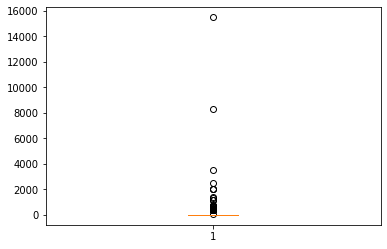

In [26]:
plt.boxplot(housing_df['MiscVal'])

In [27]:
#treating outliers
Q1 = housing_df['MiscVal'].quantile(0.1)
Q3 = housing_df['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (housing_df['MiscVal'] <= Q3 + 1.5*IQR)]
housing_df.shape

(1361, 80)

{'whiskers': [<matplotlib.lines.Line2D at 0x142c0fece88>,
 'caps': [<matplotlib.lines.Line2D at 0x142c0ff1f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x142c0fbbb88>],
 'medians': [<matplotlib.lines.Line2D at 0x142c0ff4f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x142c0ff4f88>],
 'means': []}

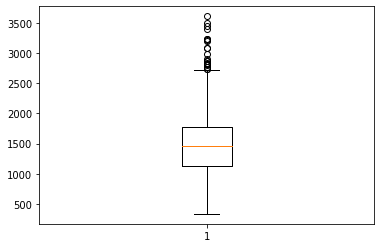

In [28]:
#plotting GrLivArea
plt.boxplot(housing_df['GrLivArea'])

In [29]:
#treating outliers
Q1 = housing_df['GrLivArea'].quantile(0.1)
Q3 = housing_df['GrLivArea'].quantile(0.9)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df['GrLivArea'] >= Q1 - 1.5*IQR) & 
                      (housing_df['GrLivArea'] <= Q3 + 1.5*IQR)]
housing_df.shape

(1361, 80)

{'whiskers': [<matplotlib.lines.Line2D at 0x142c21a5108>,
 'caps': [<matplotlib.lines.Line2D at 0x142c21a5b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x142c10292c8>],
 'medians': [<matplotlib.lines.Line2D at 0x142c21a2448>],
 'fliers': [<matplotlib.lines.Line2D at 0x142c0ebabc8>],
 'means': []}

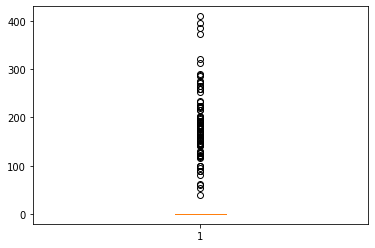

In [30]:
#plotting ScreenPorch
plt.boxplot(housing_df['ScreenPorch'])

In [31]:
#treating outliers
Q1 = housing_df['ScreenPorch'].quantile(0.1)
Q3 = housing_df['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (housing_df['ScreenPorch'] <= Q3 + 1.5*IQR)]
housing_df.shape

(1255, 80)

{'whiskers': [<matplotlib.lines.Line2D at 0x142c05e7448>,
 'caps': [<matplotlib.lines.Line2D at 0x142c05e6448>,
 'boxes': [<matplotlib.lines.Line2D at 0x142c15d2608>],
 'medians': [<matplotlib.lines.Line2D at 0x142c22bdd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x142c05eb808>],
 'means': []}

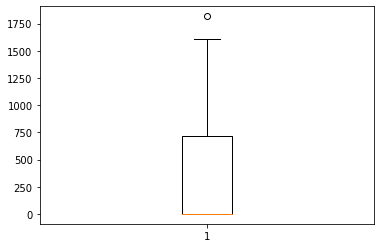

In [32]:
#plotting 2ndFlrSF plot
plt.boxplot(housing_df['2ndFlrSF'])

In [33]:
#treating outliers
Q1 = housing_df['2ndFlrSF'].quantile(0.1)
Q3 = housing_df['2ndFlrSF'].quantile(0.9)
IQR = Q3 - Q1
housing_df = housing_df[(housing_df['2ndFlrSF'] >= Q1 - 1.5*IQR) & 
                      (housing_df['2ndFlrSF'] <= Q3 + 1.5*IQR)]
housing_df.shape

(1255, 80)

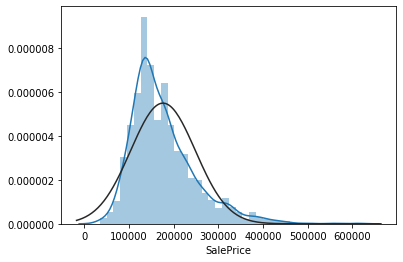

In [34]:
sns.distplot(housing_df['SalePrice'],fit=norm)


**this seems that the sales price values are right skewed which means there is some outliers in salesPrice data**<br>
*Now this SalesPrice data need to be transformed so that we can fix the data.We will use lof transformation to transform the data*

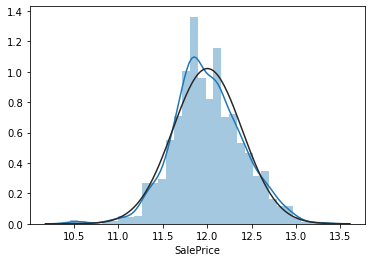

In [35]:
#using log1p for more accurate results and transforming the target variable
#using link https://stackoverflow.com/questions/36901302/log-transformation-and-index-changing-in-python
housing_df['SalePrice'] = np.log1p(housing_df["SalePrice"])
sns.distplot(housing_df['SalePrice'],fit=norm)
(mu, sigma) = norm.fit(housing_df['SalePrice'])


{'whiskers': [<matplotlib.lines.Line2D at 0x142c11d9ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x142c11dde88>,
 'boxes': [<matplotlib.lines.Line2D at 0x142c11aed48>],
 'medians': [<matplotlib.lines.Line2D at 0x142c11e1e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x142c11e1f08>],
 'means': []}

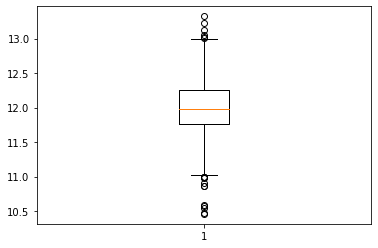

In [36]:
#Plotting the salePrice varaible to see if the outliers are handled 
plt.boxplot(housing_df['SalePrice'])

In [37]:
housing_df.shape

(1255, 80)

In [38]:
#converting years into no. of year by subtracting it from the current year
housing_df['YearBuilt'] = 2020 - housing_df['YearBuilt']
housing_df['YearRemodAdd'] = 2020 - housing_df['YearRemodAdd']
housing_df['GarageYrBlt'] = 2020 - housing_df['GarageYrBlt']
housing_df['YrSold'] = 2020- housing_df['YrSold']


In [39]:
housing_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,12,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,13,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,12,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,14,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,12,WD,Normal,12.429220


In [40]:
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64

In [41]:
#Imputing the values of GarageYrBlt 
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype('category')
housing_df['GarageYrBlt'].value_counts()

15.0     63
14.0     55
16.0     49
17.0     44
13.0     40
         ..
78.0      1
87.0      1
93.0      1
102.0     1
114.0     1
Name: GarageYrBlt, Length: 95, dtype: int64

In [42]:
#As most of the values for garageYrblt is 14 thus imputing the null values with the same.
housing_df.loc[pd.isnull(housing_df['GarageYrBlt']), ['GarageYrBlt']] = 15.0
round(100*(housing_df.isnull().sum()/len(housing_df.index)), 2)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 80, dtype: float64

**So , our data is now cleaned , we have imputed the values and dropped the values which are not required**

In [43]:
housing_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,12,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,13,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,12,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,14,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,12,WD,Normal,12.429220


In [44]:
#converting the categorical variables in dummy variable
varlist1=['Street']
# Defining the map function
def binary_map(x):
    return x.map({'Grvl': 1, 'Pave': 0})
# Applying the function to the housing list
housing_df[varlist1] = housing_df[varlist1].apply(binary_map)

In [45]:
varlist2=['CentralAir']
# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, 'N': 0})
# Applying the function to the housing list
housing_df[varlist2] = housing_df[varlist2].apply(binary_map)

In [46]:
housing_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,0,No Alley,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,12,WD,Normal,12.247699
1,20,RL,80.0,9600,0,No Alley,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,13,WD,Normal,12.109016
2,60,RL,68.0,11250,0,No Alley,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,12,WD,Normal,12.317171
3,70,RL,60.0,9550,0,No Alley,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,14,WD,Abnorml,11.849405
4,60,RL,84.0,14260,0,No Alley,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,12,WD,Normal,12.429220


In [47]:
#selecting the categories datatypes from the main dataset
housing_categories=housing_df.select_dtypes(include=['object'])
housing_categories.head(5)

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [48]:
#converting the categories into dummies
housing_dummies = pd.get_dummies(housing_categories, drop_first = True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
#drop the duplicate categorical data
housing=housing_df.drop(list(housing_categories.columns), axis = 1)

In [50]:
X = pd.concat([housing, housing_dummies], axis = 1)

In [51]:
X.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,7,5,17,17,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,0,6,8,44,44,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,0,7,5,19,18,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,0,7,5,105,50,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,0,8,5,20,20,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [52]:
X.shape

(1255, 248)

**Step4:Splitting test train split**

In [53]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=248)

In [54]:
#Creating the dependent varaiable from the dataset
y=X.pop('SalePrice')

In [55]:
y.head()

0    0.627663
1    0.272615
2    0.805522
3   -0.392029
4    1.092384
Name: SalePrice, dtype: float64

### Test train Splitting of data ###

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

**Step5:Model Building and Evaluation**<br>
**1.Feature selection using RFE**<br>
**2.Ridge Regression**<br>
**3.Lasso Regression**

In [57]:
#Using RFE checking the top 50 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [58]:
#selecting the RFE columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_scores.columns

Index(['Column_Names', 'Status', 'Rank'], dtype='object')

In [59]:
#Assigning selected columns to test and train data
rfe_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
X_train = X_train[rfe_columns]
X_test = X_test[rfe_columns]
rfe_columns

['LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'GarageCars',
 'MiscVal',
 'MSZoning_FV',
 'MSZoning_RM',
 'LandSlope_Sev',
 'Neighborhood_Crawfor',
 'RoofStyle_Shed',
 'RoofMatl_Metal',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior2nd_CBlock',
 'BsmtQual_No Basement',
 'BsmtCond_No Basement',
 'BsmtCond_Po',
 'BsmtExposure_Gd',
 'BsmtFinType1_No Basement',
 'Heating_Grav',
 'HeatingQC_TA',
 'Electrical_Mix',
 'FireplaceQu_No Fireplace',
 'GarageType_Attchd',
 'GarageType_BuiltIn',
 'GarageType_Detchd',
 'GarageType_No Garage',
 'GarageFinish_No Garage',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_No Garage',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_No Garage',
 'GarageCond_Po',
 'GarageCond_TA',
 'SaleType_New',
 'SaleCondition_Normal']

In [60]:
# list of alphas 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [61]:
#computing the coeff values with the model cv
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004662,0.003881,0.005095,0.003589,0.0001,{'alpha': 0.0001},-0.251140,-0.212038,-0.212270,-0.209493,...,-0.211795,0.024411,24,-0.191198,-0.199800,-0.199553,-0.199713,-0.211773,-0.200407,0.006566
1,0.001451,0.002902,0.005060,0.003518,0.001,{'alpha': 0.001},-0.251140,-0.212037,-0.212270,-0.209493,...,-0.211795,0.024411,23,-0.191198,-0.199800,-0.199553,-0.199713,-0.211773,-0.200407,0.006566
2,0.001704,0.003163,0.000000,0.000000,0.01,{'alpha': 0.01},-0.251141,-0.212036,-0.212271,-0.209492,...,-0.211794,0.024412,22,-0.191198,-0.199801,-0.199553,-0.199713,-0.211773,-0.200408,0.006566
3,0.007390,0.002834,0.000560,0.001120,0.05,{'alpha': 0.05},-0.251148,-0.212030,-0.212271,-0.209484,...,-0.211792,0.024416,21,-0.191198,-0.199802,-0.199552,-0.199716,-0.211774,-0.200408,0.006566
4,0.007303,0.003496,0.000000,0.000000,0.1,{'alpha': 0.1},-0.251156,-0.212023,-0.212272,-0.209475,...,-0.211789,0.024421,20,-0.191198,-0.199803,-0.199551,-0.199719,-0.211776,-0.200409,0.006567


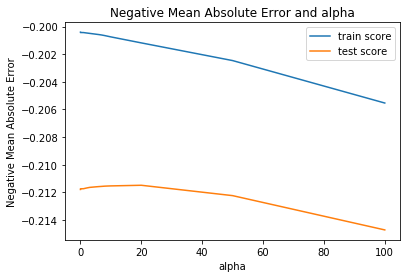

In [62]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
#plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

*As per graph the maximum point of the test and train score is 20 .Lets compute it as well*

In [63]:
#best param and best score 
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.21149160680664755


In [64]:
#fit the Ridge model
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 8.12259874e-02,  2.56203474e-01,  1.42828111e-01, -2.17902522e-01,
        9.69362545e-02,  5.34888633e-03,  1.24790333e-02,  1.15840350e-01,
        9.14559398e-02,  1.21356902e-01,  1.89907391e-02,  1.76915893e-01,
        4.31853594e-02,  9.07301477e-02,  0.00000000e+00,  2.86593936e-02,
       -5.46274775e-02,  6.12984075e-04,  5.40934676e-02,  1.03549854e-03,
        3.32987697e-04,  3.07261837e-02, -5.92677867e-04, -5.92677867e-04,
        1.04938419e-03,  1.04938419e-03, -2.76966853e-03,  4.01479456e-02,
        1.04938419e-03, -5.50283913e-02, -5.75302582e-02, -3.91534072e-03,
       -4.90575974e-02,  8.94028572e-02,  4.86343010e-02,  6.99264212e-02,
       -8.39754151e-04, -8.39754151e-04, -2.72233125e-02, -2.43499897e-03,
       -8.39754151e-04, -6.04304393e-03, -2.04069393e-02, -1.40911997e-02,
       -3.84624195e-05, -8.39754151e-04, -1.63170926e-02, -2.77532793e-02,
        1.04727504e-01,  5.80089706e-02])

In [65]:
#Calculating the R2 Score
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train, y_train_pred))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.922831123554039
0.8867175656061645


In [66]:
#Top 10 Feature selection by Ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [67]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
2,OverallCond,0.256203
12,BsmtFullBath,0.176916
3,YearBuilt,0.142828
10,LowQualFinSF,0.121357
8,1stFlrSF,0.115840
49,SaleCondition_Normal,0.104728
5,BsmtFinSF2,0.096936
9,2ndFlrSF,0.091456
14,MiscVal,0.090730
34,GarageType_BuiltIn,0.089403


**R2 score in Ridge is quite good and the top 10 feature from Ridge have low coeff value .Alpha score in Ridge is 20 and best score is -0.211**

**Step2:Lasso Regression**

In [68]:
#Computing the model by lasso Regression
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3304336457387791, tolerance: 0.07128954957192345
  positive)
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [69]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036499,0.007103,0.001543,0.003087,0.0001,{'alpha': 0.0001},0.880971,0.905745,0.916961,0.924261,...,0.914154,0.020514,2,0.932607,0.926202,0.923085,0.921947,0.916995,0.924167,0.005156
1,0.018546,0.004025,0.000536,0.000845,0.001,{'alpha': 0.001},0.880105,0.906278,0.917620,0.924541,...,0.914356,0.020913,1,0.932453,0.926003,0.922860,0.921672,0.916753,0.923948,0.005190
2,0.003596,0.003884,0.003085,0.003787,0.01,{'alpha': 0.01},0.879864,0.905949,0.919127,0.922696,...,0.913048,0.019414,3,0.930166,0.922475,0.919099,0.918872,0.913470,0.920816,0.005493
3,0.006401,0.003486,0.001964,0.003200,0.05,{'alpha': 0.05},0.870682,0.880971,0.897052,0.901795,...,0.892397,0.014672,4,0.905904,0.899985,0.893748,0.895668,0.892932,0.897647,0.004796
4,0.003780,0.003577,0.000000,0.000000,0.1,{'alpha': 0.1},0.838644,0.835422,0.847927,0.865935,...,0.851790,0.014322,5,0.862901,0.858258,0.853015,0.854364,0.851146,0.855937,0.004192


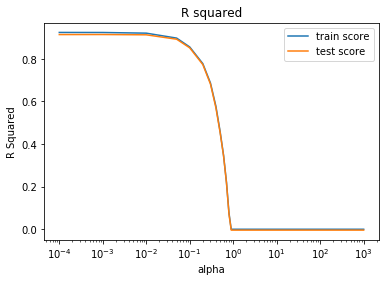

In [70]:
#plotting the graph on the log scale
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting graphs
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R Squared')

plt.title("R squared")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [71]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
0.9143561099481419


*Alpha score in Lasso is 0.001*

In [72]:
#fit the lasso model
alpha =0.001
lasso = Lasso(alpha=alpha)  
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
#Predicting the lasso model values 
y_train_pred = lasso.predict(X_train)
print(r2_score(y_train, y_train_pred))

y_test_pred = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred))



0.9230066478532681
0.886554515417956


In [74]:
#lasso coeff values
lasso.coef_

array([ 8.31342002e-02,  2.60931864e-01,  1.47031319e-01, -2.30228435e-01,
        8.63882782e-02,  1.05486256e-03, -0.00000000e+00,  1.21000555e-01,
        0.00000000e+00,  8.38402344e-03,  6.30317517e-03,  3.09158240e-01,
        4.24809459e-02,  8.40339859e-02,  0.00000000e+00,  2.63167272e-02,
       -5.26503731e-02,  0.00000000e+00,  5.54854932e-02,  4.04130928e-04,
        2.46485172e-04,  3.13386731e-02, -5.89616783e-05, -1.67254203e-17,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.96793874e-02,
        1.08806475e-03, -5.38990504e-02, -5.52216068e-02, -4.81901593e-03,
       -4.64959803e-02,  1.01759909e-01,  5.31196030e-02,  8.54879974e-02,
        7.28806797e-03,  5.70915794e-16, -2.10004657e-02, -0.00000000e+00,
        6.79855668e-05, -4.53803541e-03, -1.22946017e-02, -1.26534245e-02,
       -0.00000000e+00,  1.23351272e-03, -1.60738721e-02, -2.85364364e-02,
        1.06420124e-01,  5.96061429e-02])

In [75]:
#Selecting the feature from lasso model
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [76]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
12,BsmtFullBath,0.309158
2,OverallCond,0.260932
3,YearBuilt,0.147031
8,1stFlrSF,0.121001
49,SaleCondition_Normal,0.106420
34,GarageType_BuiltIn,0.101760
5,BsmtFinSF2,0.086388
36,GarageType_No Garage,0.085488
14,MiscVal,0.084034
1,OverallQual,0.083134


### Analysis ###
**Since we can see that r2 score for both ridge and lasso is almost similar , but we will be taking Lasso as our final model , as it penalises the coefficient values more efficiently and can also be used in feature selection by making most of the coefficient Zero making the model more sparse**

**So for final model the best features and alpha values are given below** <br>
Alpha Values:<br>
Ridge Alpha = 20<br>
Lasso alpha =0.001

**Best Features<br>**
1.OverallCond<br>
2.BsmtFullBath<br>
3.YearBuilt<br>
4.1stFlrSF<br>
5.SaleCondition_Normal

**Q1:Ridge=alpha doubled**

In [77]:
#fit the Ridge model
alpha = 40
ridge_1= Ridge(alpha=alpha)

ridge_1.fit(X_train, y_train)
ridge_1.coef_

array([ 7.93218492e-02,  2.53151899e-01,  1.37429199e-01, -2.06805291e-01,
        9.60695087e-02,  4.22782472e-03,  1.29865681e-02,  1.15084043e-01,
        9.09002271e-02,  1.19228018e-01,  1.79386809e-02,  1.74529183e-01,
        4.33946920e-02,  9.40029550e-02,  0.00000000e+00,  2.97581004e-02,
       -5.59750397e-02,  6.58524818e-04,  5.14491295e-02,  1.37039530e-03,
        9.97605924e-05,  2.96844353e-02, -7.73872248e-04, -7.73872248e-04,
        5.15038466e-04,  5.15038466e-04, -3.34216383e-03,  3.96492630e-02,
        5.15038466e-04, -5.47357267e-02, -5.94860073e-02, -4.72464845e-03,
       -5.08963930e-02,  6.77548872e-02,  3.92727289e-02,  4.59375541e-02,
       -1.57686192e-04, -1.57686192e-04, -2.32352833e-02,  1.03027657e-03,
       -1.57686192e-04, -4.51683624e-03, -1.01886531e-02, -9.58900923e-03,
        2.48326479e-03, -1.57686192e-04, -1.33376891e-02, -1.71578862e-02,
        1.01341995e-01,  5.44540680e-02])

In [78]:
#Top 10 Feature selection by Ridge
model_parameter_1 = list(ridge_1.coef_)
model_parameter_1.insert(0,ridge_1.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef_1 = pd.DataFrame(list(zip(cols,model_parameter_1)))
ridge_coef_1.columns = ['Feaure','Coef']

In [79]:
ridge_coef_1.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
2,OverallCond,0.253152
12,BsmtFullBath,0.174529
3,YearBuilt,0.137429
10,LowQualFinSF,0.119228
8,1stFlrSF,0.115084
49,SaleCondition_Normal,0.101342
5,BsmtFinSF2,0.096070
14,MiscVal,0.094003
9,2ndFlrSF,0.090900
1,OverallQual,0.079322


*OverallQual feature is added when value of alpha is doubled in ridge*

**Q1 Lasso value is doubled**

In [80]:
alpha =0.002
lasso = Lasso(alpha=alpha)  
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
lasso.coef_

array([ 8.26212141e-02,  2.64626632e-01,  1.46153812e-01, -2.28592870e-01,
        8.70060165e-02,  0.00000000e+00, -0.00000000e+00,  1.17951947e-01,
        0.00000000e+00,  5.21055158e-03,  4.92472976e-03,  3.10900759e-01,
        4.16578759e-02,  8.10597521e-02,  0.00000000e+00,  2.51642212e-02,
       -5.28371070e-02,  0.00000000e+00,  5.26429920e-02,  0.00000000e+00,
        0.00000000e+00,  3.08127418e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  3.75244415e-02,
        0.00000000e+00, -5.22284541e-02, -5.50928380e-02, -4.94955167e-03,
       -4.63061926e-02,  6.08012814e-02,  3.29693556e-02,  4.76443995e-02,
        6.47484329e-03,  1.43782417e-16, -2.02761622e-02,  0.00000000e+00,
        4.61164188e-06, -4.38956329e-03, -8.95053699e-03, -0.00000000e+00,
        3.89288123e-03,  6.23384056e-06, -9.07154900e-03, -5.69344446e-03,
        1.04681962e-01,  5.77799480e-02])

In [82]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [83]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
12,BsmtFullBath,0.310901
2,OverallCond,0.264627
3,YearBuilt,0.146154
8,1stFlrSF,0.117952
49,SaleCondition_Normal,0.104682
5,BsmtFinSF2,0.087006
1,OverallQual,0.082621
14,MiscVal,0.081060
34,GarageType_BuiltIn,0.060801
19,RoofStyle_Shed,0.052643


*RoofStyle_Shed feature is added when lasso feature is doubled*

**Q3:Removing the top five predictor variables from lasso model and performing the prediction

In [84]:
X_train_1=X_train

In [85]:
X_train_1=X_train_1.drop(columns=['BsmtFullBath','OverallCond','YearBuilt','1stFlrSF','SaleCondition_Normal'], axis = 1)

In [86]:
X_train_1.shape

(878, 45)

In [87]:
lasso = Lasso()
# cross validation
model_cv_1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_1.fit(X_train_1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3212983741133115, tolerance: 0.06948699563128433
  positive)
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4162601386187106, tolerance: 0.08823882987474535
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [88]:
cv_results = pd.DataFrame(model_cv_1.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025677,0.004223,0.001305,0.002610,0.0001,{'alpha': 0.0001},0.858498,0.869391,0.876349,0.914618,...,0.887574,0.024584,1,0.906426,0.903445,0.899910,0.892798,0.890920,0.898700,0.005984
1,0.007847,0.002489,0.002580,0.003312,0.001,{'alpha': 0.001},0.857563,0.869827,0.877529,0.914745,...,0.887548,0.024434,2,0.906267,0.903270,0.899718,0.892564,0.890732,0.898510,0.006002
2,0.006339,0.002942,0.000200,0.000400,0.01,{'alpha': 0.01},0.856740,0.867860,0.880854,0.911044,...,0.885428,0.022111,3,0.904277,0.899910,0.896052,0.889564,0.887936,0.895548,0.006152
3,0.001457,0.002914,0.006428,0.002628,0.05,{'alpha': 0.05},0.852733,0.850796,0.869660,0.887634,...,0.869620,0.015974,4,0.883685,0.882073,0.875382,0.870169,0.871329,0.876528,0.005491
4,0.003352,0.003878,0.000000,0.000000,0.1,{'alpha': 0.1},0.829717,0.823891,0.838085,0.855964,...,0.841406,0.014066,5,0.849952,0.850827,0.844308,0.840837,0.841722,0.845529,0.004138


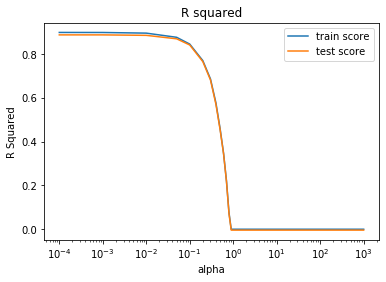

In [94]:
#plotting the graph on the log scale
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting graphs
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R Squared')

plt.title("R squared")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [90]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
0.9143561099481419


In [91]:
alpha =0.0001
lasso = Lasso(alpha=alpha)  
lasso.fit(X_train_1, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4162601386187106, tolerance: 0.08823882987474535
  positive)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_1.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [93]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
2,BsmtFinSF1,0.349783
9,GarageCars,0.237725
30,GarageType_BuiltIn,0.186798
3,BsmtFinSF2,0.133765
32,GarageType_No Garage,0.124928
6,2ndFlrSF,0.120508
10,MiscVal,0.117366
31,GarageType_Detchd,0.112684
1,OverallQual,0.058258
15,RoofStyle_Shed,0.050798
